# Wine Data로 Linear Regression

In [1]:
"""
들어가며
Linear Regerssion == 선형회귀
통계학에서, 선형 회귀(線型回歸, 영어: linear regression)는 
종속 변수 y와 한 개 이상의 독립 변수 (또는 설명 변수) X와의 선형 상관 관계를 모델링하는 회귀분석 기법이다. 
한 개의 설명 변수에 기반한 경우에는 단순 선형 회귀, 둘 이상의 설명 변수에 기반한 경우에는 다중 선형 회귀라고 한다.

두 변수, 혹은 여러 개의 변수들간 관계를 보여주는 데이터에서 어떠한 패턴을 찾아내고자 하는 것이 연구자들의 목적이다.
그 중, 선형 적합(linear fitting)은 가장 많이 사용되는 방법이다. 
단 하나의 선으로 주어진 데이터의 패턴을 설명할 수 있다는 것은 굉장히 매력적이기 때문이다.

우리 모두는 일차함수에 대해서 알고 있다. x축과 y축의 좌표평면 상에 하나의 선으로 나타나는 것이 바로 일차함수이다.
선형회귀는 바로 이 일차함수를 이용하는 것이다. 어떠한 독립변수(x)와 종속변수(y)는 좌표평면위에 흩뿌려져 있을 것이고,
이와 가장 적합(fit)한 직선을 찾아내는 것은, 다시 말해 최적의 기울기와 절편을 가진 일차함수를 찾아내는 것과 동일하다.

그렇다면, 이러한 직선을 어떻게 구할 것인지가 문제로 남는다.
다행스럽게도, 선형회귀의 역사는 오래되었고, 많은 수학자들은 이에 대한 해답을 내놓았다.
따라서 우리는 어떻게 적절한 직선을 구할 것인지에 대한 원리를 탐구하는 것보다는, 
이미 해답이 제시되어 있는 여러 수학적 지식들을 이해하는 것이 보다 더 중요할 것이다.

그럼에도 불구하고, 잠시 수학적인 얘기가 필수불가결하다.
최대한 간단하게 설명해보자면, 실제 데이터(실제값)과 우리가 예측한 어떠한 선(일차함수)에는 분명한 차이가 존재할 것이다.
그러한 차이를 우리는 오차(error)라고 한다. 이 오차를 최소화 하는 것이 곧 가장 적절한 일차함수를 찾는 것과 동일하다.

그런데 여기서 문제가 발생한다. 좌표평면을 상상해보자. 무작위로 흩뿌려져있는 점들 사이로 직선이 하나 지나간다.
여기서, 직선이 점들의 '사이'를 지나간다는 것은 점들이 직선의 '위'와 '아래'에 놓여져 있다는 것을 의미한다.
직선보다 위에 있는 점과의 차이는 반드시 양수일 것이고,
직선보다 아래에 있는 점과의 차이는 반드시 음수일 것이다.
따라서 문제가 발생한다. 오차를 최소화 하기 위해서는 오차들을 전부 더해보아야하는데, 
오차가 양수와 음수라면 서로 더해지면서 상쇄가 될 것이기 때문이다.

이를 어떻게 해결해야할 것인가?
답은 간단하다. 오차를 절대값으로 만들어 계산하거나, 오차를 제곱(^2)해주면 된다.
이 중, 선형회귀에서 가장 많이 사용되는 방법은 오차제곱의 합을 최소화하는 직선을 찾는 것이다. 
이 오차제곱의 합을 SSE(Sum of Squared Errors)라고 부른다.
그리고 이 오차제곱의 합을 최소화하는 직선을 찾기위한 방법이 바로 최소자승법이다.

다시 한번 생각해보자. 
우리의 목표는 완벽한 일차함수, 최적합(fit)직선을 찾는 것이고, 이를 위해서 오차제곱의 합을 최소화해야하며, 최소자승법을 사용해야 한다. 
오차는 앞서 말했듯, 실제값과 예측값의 차이이다. 그런데 우리가 만든 예측식은 필연적으로 정확하지 않기 때문에,
미지수로 생각해도 무방할 것이다.

오차를 미지수로 생각하면, 오차를 제곱하여 최소화가 되도록 만든다는 것은 곧 2차 함수의 최소점을 찾는 것을 의미한다.
우리 모두가 알다싶이, 2차함수는 반드시 최소점이 존재한다. 
이 최소점을 찾는다는 것은, 곧 1차함수의 기울기 값을 알게된다는 말과 동일하다.

여기서 많은 사람들이 좌절한다. 2차함수의 최소점을 구하는 것이 어떻게 1차함수의 기울기를 찾게 되는 것인가?
이를 이해하기 위해서는 미분과 편미분에 대해서 알아야하지만, 그러한 방식이 아닌 보다 쉬운 방식으로 설명을 해보려고한다.

먼저 우리는 방금 오차를 미지수로 두고, 2차함수를 만들었다.
알다싶이, 2차함수는 반드시 최소점이 존재하는 함수이다. (제곱을 했기 때문에 반드시 양수이고, U자 모양일 것이다.)
여기까지 이해했다면, 우선 이부분만 기억하고 다음 말을 이해해보자.

선은 어떻게 만들어지는가? 두 점을 이어서 만들어진다.
일차함수를 생각해보자. y 절편(bias)은 어떻게 구하는가? y = ax + b라는 함수에서 x에 0을 넣으면 b가 절편이다.
우리의 예측식 역시 일차함수이기 때문에, x에 0을 넣는다면 예측식의 절편은 매우 쉽게 구할 수 있을 것이다.
이렇게 점 하나를 구한다.

그 다음으로, 아까 기억한 오차의 함수, 즉 2차함수를 보자. 2차 함수 역시 최소점이 존재한다. 
그렇다면, 그 최소점과 아까구한 절편을 잇는다면? 바로 그 순간 선이 완성된다.
이 선은 1차함수일 것이고,
이 1차함수가 바로 최적합(best-fitting) 직선(line)이다.
이후에는 다들 배웠지만 기억나지 않을 뿐인 중학교 수준의 연립방정식를 거쳐 기울기(a)가 구해진다.

이것이 선형회귀의 전부이다. 
미지의 1차함수 포맷을 만들고, 실제값과의 차이(오차)를 제곱하여 2차함수의 형식을 만든 뒤,
절편과 2차함수의 최소값을 구해 연결하고 연립방정식을 풀어 기울기를 구한다. 

이제, 실제 데이터를 가지고 선형회귀가 어떠한 방식으로 데이터를 설명하는지를 알아볼 것이다.
보다 더 상세한 정보를 알고 싶다면,
"https://ko.wikipedia.org/wiki/선형_회귀" 를 참고하여도 좋을 것이다. 
데이터는 ML분야에서 많이 사용되는 RedWine, WhiteWine의 데이터를 사용할 것이다.
"""
""

''

In [2]:
import os # 파일 경로 핸들링 
import pandas as pd # Pandas DataFrame

In [3]:
# 현재 작업경로 확인 
# get current working directory
BASE_DIR = os.getcwd()
BASE_DIR

'C:\\Users\\student\\Documents\\python_basic'

In [4]:
# python에서 dataset을 불러오기 위해 현재 작업경로를 os.path에 join
# 폴더의 이름은 'datasets'
DATASET_DIR = os.path.join(BASE_DIR, 'datasets')
DATASET_DIR

'C:\\Users\\student\\Documents\\python_basic\\datasets'

In [28]:
# 와인 데이터 불러오기
# 각각 red_file, white_file 이라는 변수에 저장
red_file = os.path.join(DATASET_DIR, 'winequality-red.csv')
white_file = os.path.join(DATASET_DIR, 'winequality-white.csv')

In [29]:
# csv파일을 열어보면, column 하나에 모든 데이터들이 들어있기 때문에, sep를 사용해서 ;를 기준으로 분류한다. 
wine_red = pd.read_csv(red_file, sep=';')
wine_white = pd.read_csv(white_file, sep=';')

In [30]:
# 레드 와인 데이터를 간략하게 확인. head()의 default값은 5개를 가져온다. 
wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [31]:
# 화이트 와인 데이터를 간략하게 확인. tail()의 default값은 5개를 가져온다. 
wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [32]:
# 데이터의 개수 확인
print('레드 와인의 데이터는 총',len(wine_red),'개','\n화이트 와인의 데이터는 총',len(wine_white),'개')

레드 와인의 데이터는 총 1599 개 
화이트 와인의 데이터는 총 4898 개


In [33]:
# wine_red
### -----feature설명----- ###
# fixed_acidity - 고정 산도
# volatile acidity - 휘발성 산도
# citric acid - 구연산
# residual sugar - 잔류 설탕
# chlorides - 염화물
# free sulfur dioxide - free 이산화황
# total sulfur dioxide - 총 이산화황
# density - 밀도
# pH - pH
# sulphates - 황산염
# alcohol - 알코올
# 출력 변수 (감각 데이터 기준) :
# quality - 품질 (0에서 10 사이의 점수)

## red wine

In [34]:
# 데이터의 분포를 확인한다.
# None값이 존재하는가? 결측치가 존재하는가? 각 feature의 datatype은 어떠한가를 확인한다.
wine_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [35]:
# skaling이 필요한지 확인한다?
# skaling의 기준은?? 
wine_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [36]:
# scikit-learn에서는 다음과 같은 스케일링 클래스를 제공한다.

# StandardScaler(X): 평균이 0과 표준편차가 1이 되도록 변환.
# RobustScaler(X): 중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 변환.
# MinMaxScaler(X): 최대값이 각각 1, 최소값이 0이 되도록 변환
# MaxAbsScaler(X): 0을 기준으로 절대값이 가장 큰 수가 1또는 -1이 되도록 변환

In [37]:
# feaures 간의 상관분석
red_corr = wine_red.corr()
red_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [38]:
# quality와 가장 상관성이 높은 변수가 무엇인지 확인해본다.
# sort_values의 ascending(정렬)을 이용하여 내림차순으로 정렬
# ascending의 default값은 True로, 오름차순이다. 
wine_red.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

## Simple Linear Regreesion

### 0. Split train_test

In [39]:
# 손상시키지 않기 위해서 copy를 뜬다.
new_red = wine_red.copy()

# 주소값이 다른 것을 통해 copy가 된 것을 확인
print(id(new_red), id(wine_red))

146788192 86105392


In [40]:
# 무작위 추출법
from sklearn.model_selection import train_test_split
train_red, test_red = train_test_split(new_red, test_size=0.2, random_state=42)
# random_state를 통해 random으로 섞지만, 샘플링 자체는 동일하게. 일관성이 생기도록 만들어주는 값

In [41]:
new_red['quality'].value_counts()
# 확인해보면 quality의 8, 3점이 각각 18, 10개로 매우 적은 것을 알 수 있다.
# 따라서 골고루 나오게 만들기 위해 층화추출법을 사용할 논리적 근거가 된다. 

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [42]:
# StratifiedShuffleSplit - 층화추출법
from sklearn.model_selection import StratifiedShuffleSplit
# sklearn의 model selection안에 있는 Class! 

# n_splits -> 몇번 자를지?
# test_size -> test ratio
# random_state -> 무작위 숫자 입력. 여기서는 1992를 입력
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1992)
for train_index, test_index in split.split(new_red, new_red['quality']):
    # split을 통해 반복이 가능하도록 만들어준다. 
    # quality를 기준으로 층화추출하겠다. 
    # iloc은 인덱스를 기준으로 찾아낸다.
    strat_train_red = new_red.iloc[train_index]
    strat_test_red = new_red.iloc[test_index]

In [43]:
### 또는
from sklearn.model_selection import train_test_split
train_red, test_red = train_test_split(new_red, test_size=0.2, random_state=42, stratify = new_red['quality'])
# sklearn이 업데이트 되면서, 인자 값을 넣는 방식으로도 할 수 있다. 
# 하지만 n_splits의 개수는 설정이 불가능하다.

##### 층화추출이 제대로 됐나요?

In [51]:
print('new_red의 value_counts \n---------------')
print(new_red['quality'].value_counts())
print('\n\ntrain_red의 value_counts \n---------------')
print(train_red['quality'].value_counts())

new_red의 value_counts 
---------------
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


train_red의 value_counts 
---------------
5    545
6    510
7    159
4     42
8     15
3      8
Name: quality, dtype: int64


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [53]:
# linear Regression Model - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# ---------------------------------------------------------------------------------------------
# LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None):

# fit_intercept: <bool>: intercept 계산 여부 (default=True) 
# 절편을 넣을 것인가?? 

# normalize: <bool>: fit_intercept가 True일때만 사용됨. 정규화 (default=False)
# 정규화 과정을 거칠 것인가? 

# copy_X: X데이터를 덮어씌울지(normalize) (default=True) 
# X 데이터가 내부적으로 함수를 수행할 때, 기존 데이터를 바꿀 것인지 바꾸지 않을 것인지에 대해 정한다. 

# n_jobs: 최적화 분산작업 (-1은 허용하는 모든 CPU) (default=None=1)
# 한번에 몇개의 연산을 할 것인가? 
lr_model = LinearRegression()

### Alchol 과 quality의 Simple Linear Regression

In [54]:
# 단순회귀 분석을 하고, 다중회귀로 넘어간다.

In [55]:
train_red['alcohol'].head(5)
# 시리즈형으로 나온다.

1542    10.75
1558     9.50
344     10.70
924     11.20
971     10.90
Name: alcohol, dtype: float64

In [57]:
train_red['alcohol'].shape
# 1차원 배열이라는 것을 알 수 있다.

(1279,)

In [64]:
train_red['alcohol'].values
# 지금까지는 1차원 배열

array([10.75,  9.5 , 10.7 , ..., 10.3 , 11.2 , 12.  ])

In [65]:
train_red['alcohol'].values.reshape(1,-1)
# 2차원 배열로 바꾸어준다.

array([[10.75,  9.5 , 10.7 , ..., 10.3 , 11.2 , 12.  ]])

In [66]:
len(train_red['quality']), len(train_red['alcohol'])

(1279, 1279)

In [67]:
# 항이 하나여도 2차원 배열로 들어가야함. --> 일반화
# 벡터는 기본적으로 열벡터
X = train_red['alcohol'].values.reshape(-1, 1) # 구하기 위해서는, 하나는 행벡터로 만들어주어야한다.
y = train_red['quality']
print(X.shape)

lr_model = LinearRegression()
lr_model.fit(X, y)

(1279, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [68]:
lr_model.coef_
# weight. 가중치 

array([0.36513322])

In [69]:
lr_model.intercept_

1.8309049862411086

In [70]:
# Returns the coefficient of determination R^2 of the prediction.  
# The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).  
# sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().  
# The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).  
# A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.
lr_model.score(X, y)

0.23155091505246325

model.score
$$R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}$$
SST: Sum of Square Total로 편차의 제곱합

$$SST = \sum_{i=1}^{n}(y_i-\hat{y_i}+\hat{y_i}-\bar{y})^2 = \sum_{i=1}^{n}(y_i-\bar{y})^2 $$
SSR: Sum of Square Regression 회귀식과 평균값의 차이
$$SSR = \sum(\hat{y}_i-\bar{y})^2$$

note: 학습데이터에 대한 모델의 신뢰도를 쉽게 파악할 수 있다는 장점

### Train Set

In [71]:
lr_model.score(X, y)

0.23155091505246325

In [72]:
from sklearn.metrics import r2_score
train_pred = lr_model.predict(X)
r2_score(y, train_pred) # 같음

0.23155091505246328

In [75]:
from sklearn.metrics import mean_squared_error

train_pred = lr_model.predict(X)
mean_squared_error(train_pred, y) # MSE
# MSE? 

0.502086542013329

### Test Set

In [76]:
X_test = test_red['alcohol'].values.reshape(-1, 1)
y_test = test_red['quality']

In [77]:
lr_model.score(X_test, y_test)

0.2070421320468614

In [80]:
test_pred = lr_model.predict(X_test)
# test_pred

In [81]:
from sklearn.metrics import r2_score
r2_score(y_test, test_pred) # 같음

0.2070421320468614

In [82]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, test_pred)

0.5116746492467928

### 위에서 계산한 것들을 확인

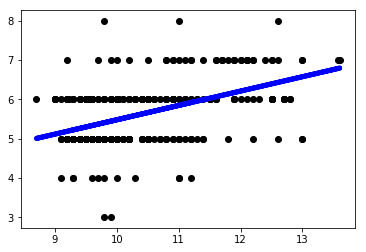

In [86]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, test_pred, color='blue', linewidth=5)
plt.show()

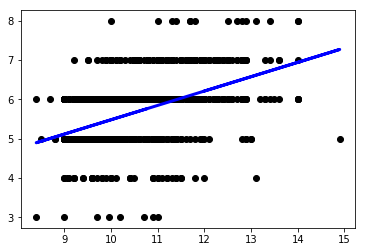

In [85]:
plt.scatter(X, y, color='black')
plt.plot(X, train_pred, color='blue', linewidth=3)
plt.show()

# 실습1. White Wine으로 X=alcohol , y=Quality Linear Regression

In [89]:
# white wine의 info 확인
wine_white.info()
# none값 x, 전부 수치형 확인 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [90]:
wine_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [94]:
white_corr = wine_white.corr()
white_corr[white_corr<1]
# [white_corr<1] 로 1보다 작은 것들만을 출력하도록 한다.
# 확인결과, white wine에서도 alcohol이 0.435로 그나마 높은 값을 보인다는 것을 알 수 있다.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,NaN,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,NaN,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,NaN,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,NaN,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,NaN,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,NaN,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,NaN,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,NaN,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,NaN,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,NaN,-0.017433,0.053678


In [96]:
wine_white.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

### 단순회귀분석

#### 데이터 분리

In [100]:
# 먼저 데이터의 손실을 막기위해 copy본 생성
new_white = wine_white.copy()
# new_white

In [101]:
# 무작위 추출법
from sklearn.model_selection import train_test_split

train_white, test_white = train_test_split(new_white, test_size=0.2, random_state=1992)

In [107]:
#train_white # 3918개
# test_white # 980개

In [149]:
# StratifiedShuffleSplit - 층화추출법
from sklearn.model_selection import StratifiedShuffleSplit

# n_splits -> 몇번 자를지?
# test_size -> test ratio
# random_state -> 
temp_split = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=1992)
for train_index, test_index in temp_split.split(new_white, new_white['quality']):
    # 뒤에 split 함수를 써주어야만 split이 가능해진다.
    strat_train_red = new_white.iloc[train_index]
    strat_test_red = new_white.iloc[test_index]
    print(train_index)
    # print(train_index)를 해보면, n_splits의 값과 개수가 일치하는 것을 확인할 수 있다.

[1751  838 3321 ... 1374 4351 2524]
[  88  135 1019 ... 2639 1789 2288]
[ 175  349 4892 ... 3681 1965 1856]
[3963  273 1350 ... 1735 3757 1614]
[1407 1221 1955 ... 1469 2815 1169]


### 추출법에 대한 여러가지 실험

In [148]:
# 1. iloc이 뭔데?
new_white.iloc[[1,3]]
# iloc은 리스트처럼 사용할 수 있다.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [113]:
new_white['quality'].value_counts()
# 비율이 다르다는 것을 알 수 있다.

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [114]:
train_white['quality'].value_counts()
# 비슷하게 나눠진 것을 확인할 수 있다.

6    1771
5    1140
7     724
8     140
4     125
3      14
9       4
Name: quality, dtype: int64

In [115]:
train_white['quality'].value_counts()/len(train_red)

6    1.384676
5    0.891321
7    0.566067
8    0.109461
4    0.097733
3    0.010946
9    0.003127
Name: quality, dtype: float64

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [117]:
train_white['alcohol'].shape 
# 3918개의 행을 가진 열벡터??

(3918,)

In [151]:
train_white['alcohol'].values.reshape(-1)

array([12.3, 11.4,  8.7, ..., 10. ,  9. , 12.6])

In [118]:
train_white['alcohol'].values.reshape(1,-1)
# 2차원의 형태로 만들어준다. 근데 왜??

array([[12.3, 11.4,  8.7, ..., 10. ,  9. , 12.6]])

In [119]:
len(train_white['quality']), len(train_white['alcohol'])

(3918, 3918)

In [121]:
# 항이 하나여도 2차원 배열로 들어가야함. --> 일반화
# 벡터는 기본적으로 열벡터
X = train_red['alcohol'].values.reshape(-1, 1)
y = train_red['quality']
print(X.shape)

lr_model = LinearRegression()
lr_model.fit(X, y)

(1279, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [122]:
# Returns the coefficient of determination R^2 of the prediction.  
# The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).  
# sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().  
# The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).  
# A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.
lr_model.score(X, y)

0.23155091505246325

In [123]:
lr_model.coef_

array([0.36513322])

In [125]:
lr_model.intercept_

1.8309049862411086

## Train Set

In [127]:
lr_model.score(X, y)

0.23155091505246325

In [129]:
from sklearn.metrics import r2_score
train_pred = lr_model.predict(X)
r2_score(y, train_pred) # 같음

0.23155091505246328

In [130]:
from sklearn.metrics import mean_squared_error

train_pred = lr_model.predict(X)
mean_squared_error(train_pred, y)
# MSE가 뭔데요?

0.502086542013329

## Test Set

In [131]:
X_test = test_white['alcohol'].values.reshape(-1, 1)
y_test = test_white['quality']

In [132]:
lr_model.score(X_test, y_test)

0.1987120519906227

In [135]:
test_pred = lr_model.predict(X_test)
# test_pred

In [138]:
lr_model.score(X_test, y_test)

0.1987120519906227

In [139]:
from sklearn.metrics import r2_score
r2_score(y_test, test_pred) # 같음

0.1987120519906227

In [140]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, test_pred)

0.6493702941929056

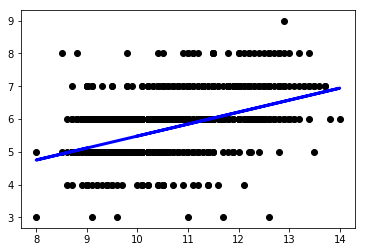

In [141]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, test_pred, color='blue', linewidth=3)
plt.show()

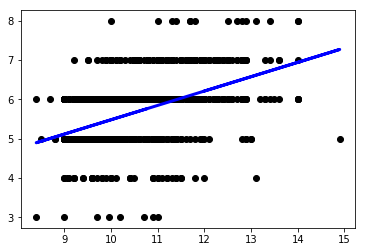

In [142]:
plt.scatter(X, y, color='black')
plt.plot(X, train_pred, color='blue', linewidth=3)
plt.show()

## Multivariate Linear regression

In [233]:
new_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [238]:
y = new_red['quality']
X = new_red.drop('quality', axis=1)
# drop 함수를 통해서 quality를 빼준다.

In [164]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1992, stratify=y)
# 인자가 두개 들어가기 때문에, 4개로 분리된다.
# stratify 는 n_splits 의 개수를 정해줄 수 없다. 참고할 것.

In [165]:
train_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
935,8.8,0.300,0.38,2.3,0.060,19.0,72.0,0.99543,3.39,0.72,11.8
98,7.6,0.900,0.06,2.5,0.079,5.0,10.0,0.99670,3.39,0.56,9.8
874,10.4,0.380,0.46,2.1,0.104,6.0,10.0,0.99664,3.12,0.65,11.8
1473,6.1,0.600,0.08,1.8,0.071,14.0,45.0,0.99336,3.38,0.54,11.0
777,6.9,0.635,0.17,2.4,0.241,6.0,18.0,0.99610,3.40,0.59,10.3


In [166]:
train_y.head()

935     6
98      5
874     7
1473    5
777     6
Name: quality, dtype: int64

## Multivariate

In [167]:
len(train_y)

1279

In [168]:
lr_model = LinearRegression()
lr_model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [169]:
lr_model.coef_

array([-8.33567734e-03, -1.05945189e+00, -2.96866390e-02,  2.05857128e-02,
       -2.27796975e+00,  5.05151229e-03, -3.51463253e-03, -8.81349967e+00,
       -6.58936911e-01,  9.78243679e-01,  2.64011549e-01])

In [163]:
lr_model.intercept_

22.107833423703564

In [171]:
list(zip(train_X.columns, lr_model.coef_))
# zip 을 통해서 보기 쉽게 바꾸어주었다.

[('fixed acidity', -0.008335677335204279),
 ('volatile acidity', -1.0594518914321183),
 ('citric acid', -0.02968663898771698),
 ('residual sugar', 0.020585712847210755),
 ('chlorides', -2.277969747369422),
 ('free sulfur dioxide', 0.005051512293752569),
 ('total sulfur dioxide', -0.0035146325285876127),
 ('density', -8.813499670169369),
 ('pH', -0.6589369110273102),
 ('sulphates', 0.9782436788981884),
 ('alcohol', 0.2640115494747824)]

### Train Set

In [241]:
train_predict = lr_model.predict(train_X)
train_predict[:2]

array([5.70071507, 5.34740564])

In [173]:
lr_model.score(train_X, train_y)

0.35321183887565333

In [174]:
mean_squared_error(train_predict, train_y)

0.42259615841204873

### Test Set

In [175]:
test_predict = lr_model.predict(test_X)
test_predict[:2]

array([5.93477012, 6.54103922])

In [176]:
lr_model.score(test_X, test_y)

0.3784375634799727

In [177]:
mean_squared_error(test_predict, test_y)

0.4010777300341536

# 실습3. White와 Red를 합쳐서 실습 X=모든Feature , y=Quality Linear Regression

In [184]:
# wine_red

In [185]:
# wine_white

In [186]:
len(wine_red) + len(wine_white)

6497

In [180]:
wine_total = wine_red.append(wine_white, ignore_index=True)

In [243]:
# wine_total

In [183]:
len(wine_total)

6497

In [188]:
wine_total.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [193]:
new_total = wine_total.copy()
# new_total

In [198]:
y = new_total['quality']
X = new_total.drop('quality', axis=1)
# y
# X

In [220]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1992)

In [221]:
len(train_X) + len(test_X)

6497

In [222]:
len(test_y) + len(train_y)

6497

In [223]:
lr_model = LinearRegression()
lr_model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [224]:
lr_model.coef_

array([ 8.00283553e-02, -1.21318877e+00, -1.13056915e-01,  4.87455122e-02,
       -1.74164263e-01,  5.57701116e-03, -2.39972688e-03, -6.69987147e+01,
        4.71187644e-01,  7.54210351e-01,  2.57046156e-01])

In [225]:
lr_model.intercept_

67.56620627503266

In [226]:
list(zip(train_X.columns, lr_model.coef_))

[('fixed acidity', 0.08002835534277752),
 ('volatile acidity', -1.213188772141482),
 ('citric acid', -0.11305691502549896),
 ('residual sugar', 0.04874551216762118),
 ('chlorides', -0.17416426251174247),
 ('free sulfur dioxide', 0.005577011160024989),
 ('total sulfur dioxide', -0.002399726881647392),
 ('density', -66.99871468332178),
 ('pH', 0.4711876440853949),
 ('sulphates', 0.7542103510531497),
 ('alcohol', 0.25704615626957383)]

### Train Set

In [227]:
train_predict = lr_model.predict(train_X)
train_predict[:2]

array([5.70071507, 5.34740564])

In [228]:
lr_model.score(train_X, train_y)

0.28550953168876714

In [229]:
mean_squared_error(train_predict, train_y)

0.5351690230815146

# Test Set

In [230]:
test_predict = lr_model.predict(test_X)
test_predict[:3]
# 예측값

array([6.48924417, 5.90458962, 6.22834285])

In [231]:
lr_model.score(test_X, test_y)

0.3137316217758499

In [232]:
mean_squared_error(test_predict, test_y)

0.5599787535923686

# 실습4. White와 Red를 합쳐서 실습 X=모든Feature , y=pH

In [246]:
wine_total = wine_red.append(wine_white, ignore_index=True)

In [247]:
new_total = wine_total.copy()
# new_total

In [248]:
y = new_total['pH']
X = new_total.drop('pH', axis=1)
# y
# X

In [249]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1992)

In [250]:
lr_model = LinearRegression()
lr_model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [254]:
# train set
train_predict = lr_model.predict(train_X)
train_predict[:2]

array([3.246384  , 3.08602721])

In [255]:
lr_model.score(train_X, train_y)

0.6083747527678668

In [256]:
# test set
test_predict = lr_model.predict(test_X)
test_predict[:3]
# 예측값

array([3.22483482, 3.13867705, 3.03630361])

In [257]:
lr_model.score(test_X, test_y)

0.6012009758124002